Kalins Final semester report code

2) What is the combined revenue of Black/brown led organizations in comparison to the total revenue of non-profits in MA? 
Filter out grantmakers, hospitcals, churches, higher ed, etc. 
How has this changed over time (we have 3 years of revenue data)? Try to incorpated news and ongoing issue that may prompted this.

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [18]:
# Read the base bundle and grant files
base_bundle = pd.read_csv('Base_bundle.csv', low_memory=False)
Demo  = pd.read_csv('Demographics.csv', low_memory=False)

# List of categories to keep
categories_to_keep = [
    'Human Service Organizations',
    'Alliance/Advocacy Organizations',
    'Parent Teacher Group',
    'Community Celebrations',
    'Single Organization Support',
    'Nonmonetary Support N.E.C.',
    'Student Services and Organizations',
    'Physical Fitness/Community Recreational Facilities',
    'Football Clubs/Leagues',
    'Community Health Systems',
    'Community, Neighborhood Development, Improvement',
    'Other Recreation, Sports, or Leisure Activities N.E.C.',
    'Community Improvement, Capacity Building N.E.C.',
    'Community Mental Health Center',
    'Civil Rights, Advocacy for Specific Groups',
    'Social Science Research Institutes, Services',
    'Vocational Technical',
    'Civil Rights, Social Action, and Advocacy N.E.C.',
    'Adult, Continuing Education',
    'Employment Procurement Assistance and Job Training',
    'Rehabilitation Services for Offenders',
    'Employment Training',
    'Employment, Job Related N.E.C.',
    'Citizenship Programs, Youth Development',
    'Youth Development Programs',
    'Children\'s and Youth Services',
    'Youth Centers, Clubs (includes Boys/Girls Clubs)- Multipurpose',
    'Developmentally Disabled Services/Centers',
    'Services to Prisoners/Families',
    'Big Brothers, Big Sisters',
    'Independent Housing for People with Disabilities',
    'Transitional Care, Half-Way House for Offenders/Ex-Offenders',
    'Vocational Rehabilitation (includes Job Training and Employment for Disabled and Elderly)',
    'Family Planning Centers',
    'Family Violence Shelters and Services',
    'Rape Victim Services'
]


In [19]:
# Merge on a common column, assuming 'ein', and manage overlapping column names
merge_data = pd.merge(base_bundle, Demo, left_on='ein', right_on='Unnamed: 0', how='inner', suffixes=('_base', '_data'))

# Filter organizations from Demographics.csv based on race leader using contains
filtered_demo = Demo[Demo['race_leader'].str.contains('Black|Hispanic|Latino|Latina|Latinx', case=False, na=False)]

# Merge on a common column, assuming 'ein', and manage overlapping column names
merged_data = pd.merge(base_bundle, filtered_demo, left_on='ein', right_on='Unnamed: 0', how='inner', suffixes=('_base', '_data'))

# Filter out organizations belonging to specific categories and located in MA
filtered_data = merged_data[(merged_data['ntee_description'].isin(categories_to_keep)) & (Demo['state_code'] == 'MA')]

# Calculate the combined revenue of Black/Brown led organizations
combined_revenue_black_brown = filtered_data['total_revenue'].sum()

# Filter out non-profit organizations in MA based on categories to keep
filtered_ma_nonprofits = merge_data[(Demo['state_code'] == 'MA') & (merge_data['ntee_description'].isin(categories_to_keep))]

# Calculate the total revenue of non-profit organizations in MA
total_revenue_ma = filtered_ma_nonprofits['total_revenue'].sum()

# Print the combined revenue of Black/Brown led organizations and total revenue of non-profit organizations in MA
print("Combined Revenue of Black/Brown led organizations in MA:", combined_revenue_black_brown)
print("Total Revenue of Non-profit Organizations in MA:", total_revenue_ma)


Combined Revenue of Black/Brown led organizations in MA: 14385447.0
Total Revenue of Non-profit Organizations in MA: 838045035.0


/var/folders/17/j3m2kzk97j3728_ygs6p6bm80000gn/T/ipykernel_35708/779033549.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = merged_data[(merged_data['ntee_description'].isin(categories_to_keep)) & (Demo['state_code'] == 'MA')]
/var/folders/17/j3m2kzk97j3728_ygs6p6bm80000gn/T/ipykernel_35708/779033549.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_ma_nonprofits = merge_data[(Demo['state_code'] == 'MA') & (merge_data['ntee_description'].isin(categories_to_keep))]


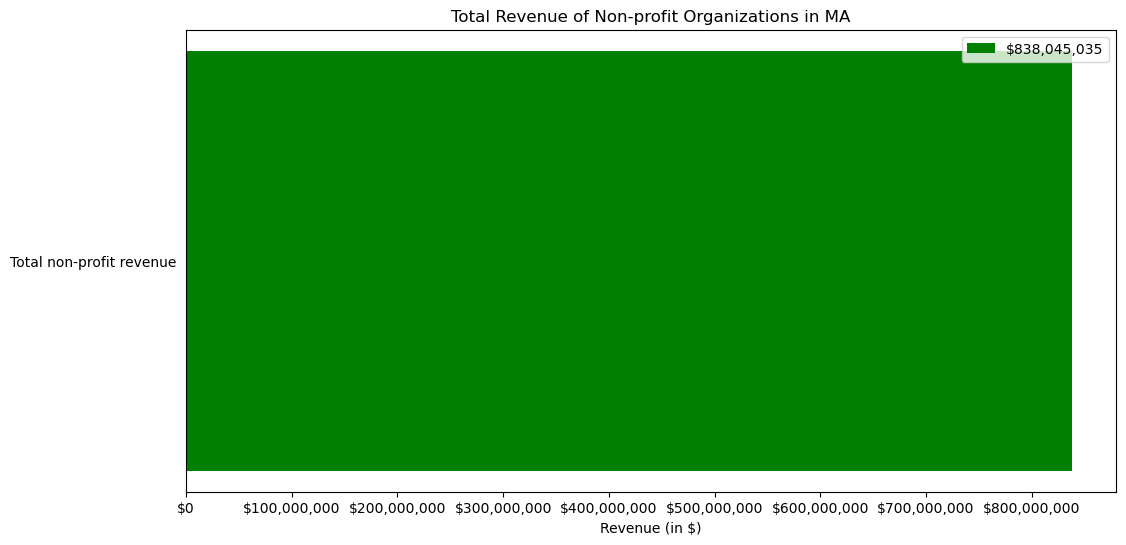

In [20]:
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(['Total non-profit revenue'],
         [total_revenue_ma],
         color=['green'])
plt.xlabel('Revenue (in $)')
plt.title('Total Revenue of Non-profit Organizations in MA')

# Add legend with revenue value
plt.legend(['${:,.0f}'.format(total_revenue_ma)])

plt.gca().tick_params(axis='y', which='both', left=False)  # Hide y-axis ticks

# Format x-axis tick labels as dollar amounts
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()


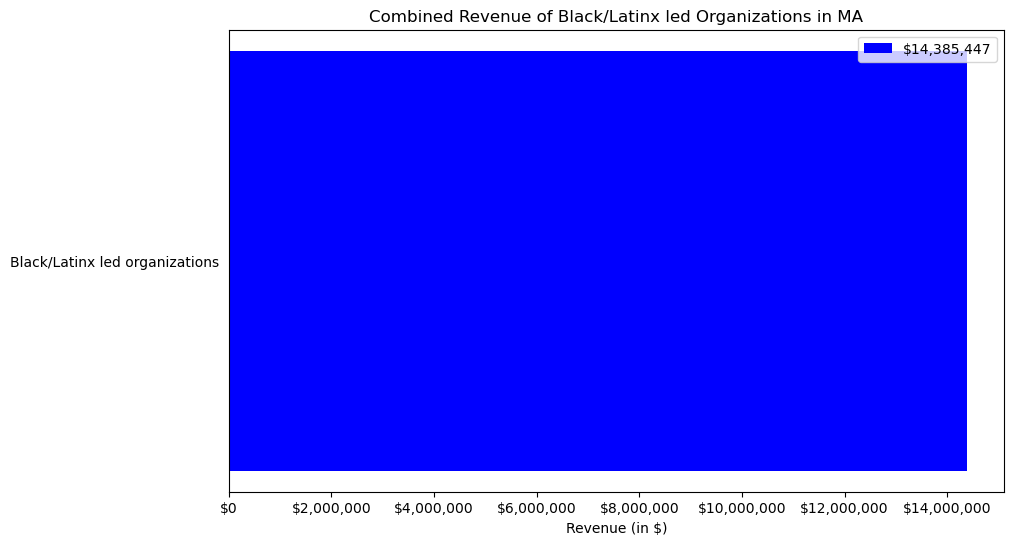

In [21]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(['Black/Latinx led organizations'],
         [combined_revenue_black_brown],
         color=['blue'])
plt.xlabel('Revenue (in $)')
plt.title('Combined Revenue of Black/Latinx led Organizations in MA')

# Add legend with revenue value
plt.legend(['${:,.0f}'.format(combined_revenue_black_brown)])

plt.gca().tick_params(axis='y', which='both', left=False)  # Hide y-axis ticks

# Format x-axis tick labels as dollar amounts
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()


In [22]:
# Calculate the total revenue of non-profit organizations in MA
total_revenue_ma = merge_data['total_revenue'].sum()

# Calculate the combined revenue of Black/Brown led organizations
combined_revenue_black_brown = merged_data['total_revenue'].sum()

# Print the combined revenue of Black/Brown led organizations and total revenue of non-profit organizations in MA
print("Combined Revenue of Black/Latinx led organizations:", combined_revenue_black_brown)
print("Total Revenue of Non-profit Organizations in MA:", total_revenue_ma)

Combined Revenue of Black/Latinx led organizations: 4711085257.0
Total Revenue of Non-profit Organizations in MA: 48123521722.0


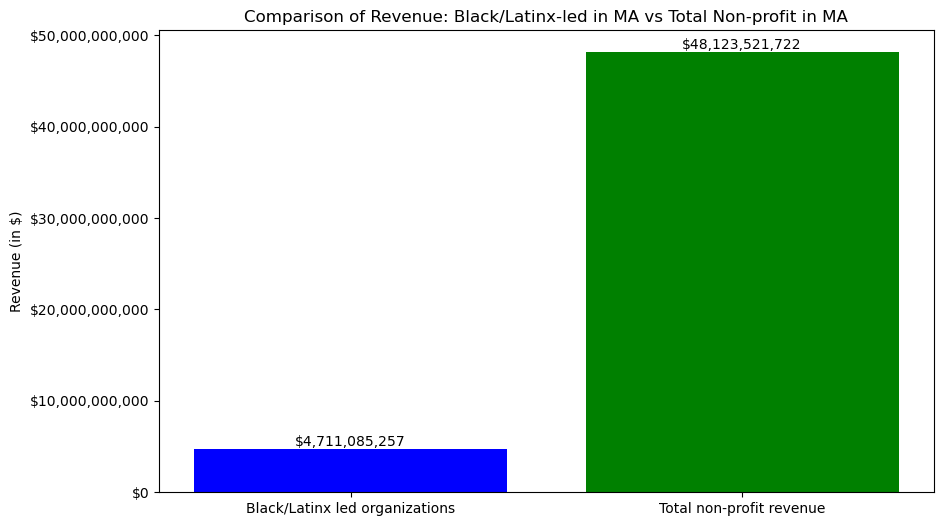

In [23]:
# Data
combined_revenue_black_brown = 4711085257.0
total_revenue_ma = 48123521722.0

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(['Black/Latinx led organizations', 'Total non-profit revenue'], [combined_revenue_black_brown, total_revenue_ma], color=['blue', 'green'])
plt.ylabel('Revenue (in $)')
plt.title('Comparison of Revenue: Black/Latinx-led in MA vs Total Non-profit in MA')

# Format y-axis tick labels as dollar amounts
formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Annotating bars with revenue values
for i, revenue in enumerate([combined_revenue_black_brown, total_revenue_ma]):
    plt.text(i, revenue, '${:,.0f}'.format(revenue), ha='center', va='bottom')

plt.show()


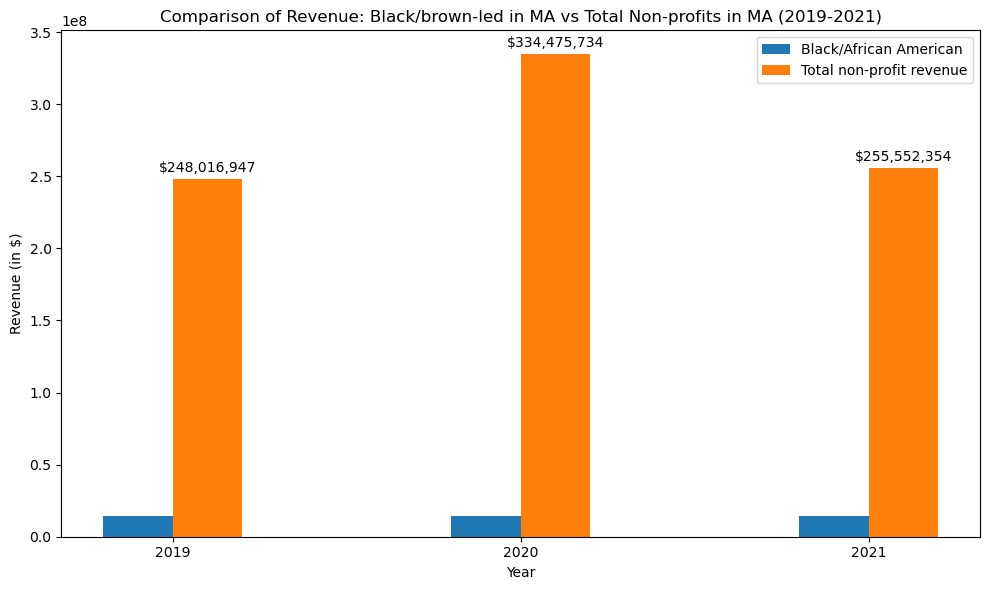

In [25]:
# Define the years explicitly
years = [2019, 2020, 2021]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(years))

for i, race_leader in enumerate(yearly_revenue_black_brown.columns):
    bars = plt.bar(x - bar_width/2 + i * bar_width, yearly_revenue_black_brown[race_leader], bar_width, label=race_leader)

bars2 = plt.bar(x + bar_width/2, yearly_revenue_ma, bar_width, label='Total non-profit revenue')

plt.xlabel('Year')
plt.ylabel('Revenue (in $)')
plt.title('Comparison of Revenue: Black/brown-led in MA vs Total Non-profits in MA (2019-2021)')
plt.xticks(x, years)  # Set the x-axis ticks to the defined years
plt.legend()

# Annotating bars with revenue amounts
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate('${:,.0f}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

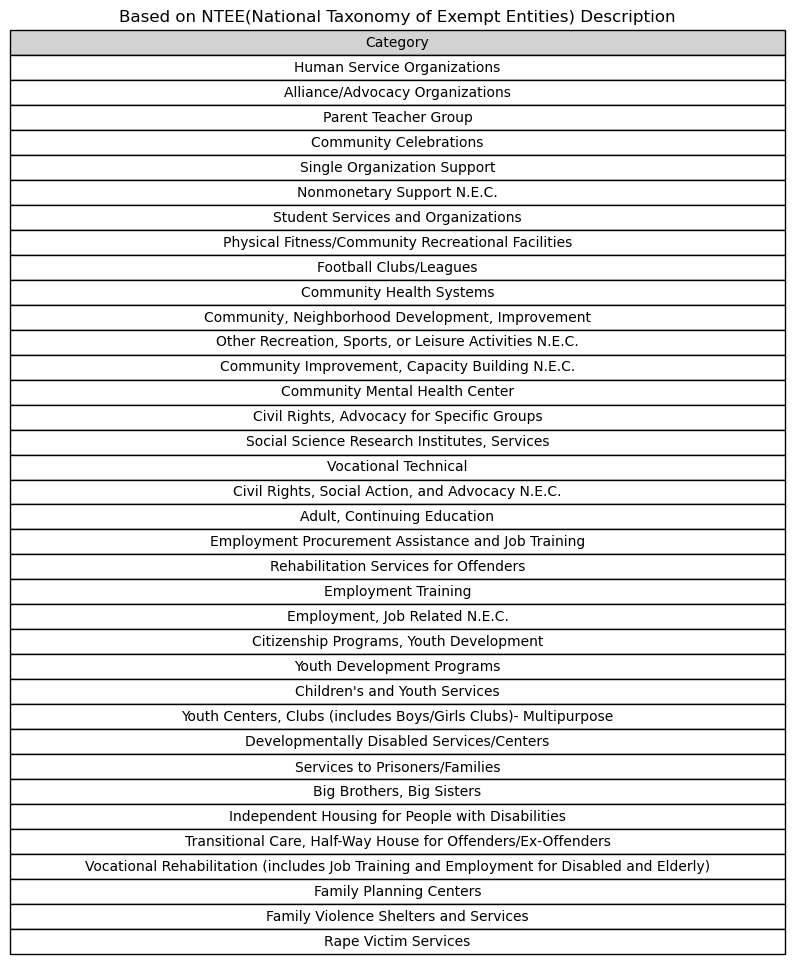

In [29]:
from tabulate import tabulate

# Create a DataFrame with the categories
categories_df = pd.DataFrame(categories_to_keep, columns=['Category'])

# Display the categories in a table format using matplotlib
plt.figure(figsize=(10, 12))
plt.table(cellText=categories_df.values,
          colLabels=categories_df.columns,
          loc='center', 
          cellLoc='center',
          colColours=['lightgray']*len(categories_df.columns),  # Change color of column headers
          bbox=[0, 0, 1, 1])  # Set bounding box to cover entire figure
plt.axis('off')  # Turn off axis
plt.title('Based on NTEE(National Taxonomy of Exempt Entities) Description')  # Add title
plt.show()

In [4]:
# Print out organization names
organization_names = filtered_orgs['organization_name'].tolist()
print("Organization Names:")
for name in organization_names:
    print(name)

Organization Names:
Casa Latina Inc
African Bridge Network
Haitian American Business Expo Inc
Haitian American Business Expo Inc
Robbins House Inc
Concerned Black Men of Massachusetts Inc
Robbins House Inc
Concerned Black Men of Massachusetts Inc
Concerned Black Men of Massachusetts Inc
Robbins House Inc
Cultura Latina Dance Academy Incorporated
Youth and Family Enrichment Services
Semana Hispana En Lawrence Inc
Eritrean American Civic Association Center Inc
Eritrean American Civic Association Center Inc
Hispanic-American Library Inc
Eritrean American Civic Association Center Inc
Hispanic-American Library Inc
Haitian American Business Expo Inc
Community Education Project Inc
Southeastern Massachusetts Ser-Jobs for Progress Inc
African Community Education Program
African Community Education Program
Bethel Institute for Social Justice A Non-Profit Corporation
Bethel Institute for Social Justice A Non-Profit Corporation
Bethel Institute for Social Justice A Non-Profit Corporation
Southeas

In [5]:
# Get unique values in the 'ntee_description' column and print them
unique_ntee_descriptions = base_bundle['ntee_description'].unique()
for ntee_description in unique_ntee_descriptions:
    print(ntee_description)

Private Grantmaking Foundations
Private Independent Foundations
Named Trusts/Foundations N.E.C.
Private Operating Foundations
Public Foundations
Community Foundations
Fund Raising Organizations That Cross Categories includes Community Funds/Trusts and Federated Giving Programs) e.g. United Way
Corporate Foundations
Law Enforcement Agencies (Police Departments)
Human Service Organizations
Historical Societies & Historic Preservation
Rehabilitative Medical Services
Alliance/Advocacy Organizations
Parent Teacher Group
Other Philanthropy, Voluntarism, and Grantmaking Foundations N.E.C.
Community Celebrations
Cancer
Single Organization Support
Nonmonetary Support N.E.C.
Student Services and Organizations
Physical Fitness/Community Recreational Facilities
Football Clubs/Leagues
nan
Education N.E.C.
Recreational, Pleasure, or Social Club
Disaster Preparedness and Relief Services
Arts, Cultural Organizations - Multipurpose
Professional Societies, Associations
Philanthropy / Charity / Voluntari